# <span style="color:green">Problem Statement<span>
This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same. 

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


# <span style="color:green"> Business Goal: <span>
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Steps in linear regression model building

1. Import the data in a dataframe using Pandas
2. Understand the data
3. Clean the data
4. Visualise data
5. Generate dummies for categorical variables
6. Split the data into training and test sets
7. Scale the features for uniformity of units
8. Build the model and do features selection 
9. Predict and evaluate

### Step 1: Import the data

In [85]:
# import panda and read the file containing the data
import pandas as pd

bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Step 2: Understand the data

In [86]:
# Printing the details of the columns such as their types
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<span style="color:#F56EB3"><strong>There isn't null values in the dataframe </strong><span>

In [87]:
# checking the shape of the data
bike_df.shape

(730, 16)

In [88]:
# Method describe give some summary stats of the data
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<span style="color:#F56EB3"><strong>All numeric columns are incremental which implies no outliers</strong><span>

### Step 3: Data Cleaning

1. Renaming some of the columns
2. Create categorical values for some of the columns such month, weekday, season and weathersit
3. Drop the columns that are not needed for the analysis and model

In [89]:
# rename the columns for a better readability
bike_df.rename(columns={'hum':'humidity', 'yr':'year', 'mnth':'month'}, inplace=True)
bike_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [90]:
# checking unique values for the columns
bike_df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [91]:
bike_df[['month', 'season', 'weekday', 'weathersit']] = bike_df[['month', 'season', 'weekday', 'weathersit']].astype('category')
bike_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [92]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     730 non-null    int64   
 1   dteday      730 non-null    object  
 2   season      730 non-null    category
 3   year        730 non-null    int64   
 4   month       730 non-null    category
 5   holiday     730 non-null    int64   
 6   weekday     730 non-null    category
 7   workingday  730 non-null    int64   
 8   weathersit  730 non-null    category
 9   temp        730 non-null    float64 
 10  atemp       730 non-null    float64 
 11  humidity    730 non-null    float64 
 12  windspeed   730 non-null    float64 
 13  casual      730 non-null    int64   
 14  registered  730 non-null    int64   
 15  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(7), object(1)
memory usage: 72.5+ KB


In [93]:
# Dropping the columns that are not necessary or can be duplicate such dteday
bike_df.drop(['instant', 'dteday', 'registered', 'casual'], axis=1, inplace=True)
bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Step 4: Visualise the data

In [94]:

categorical = bike_df[['season', 'month', 'weekday', 'weathersit','holiday', 'workingday',]].columns

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Numeric variables

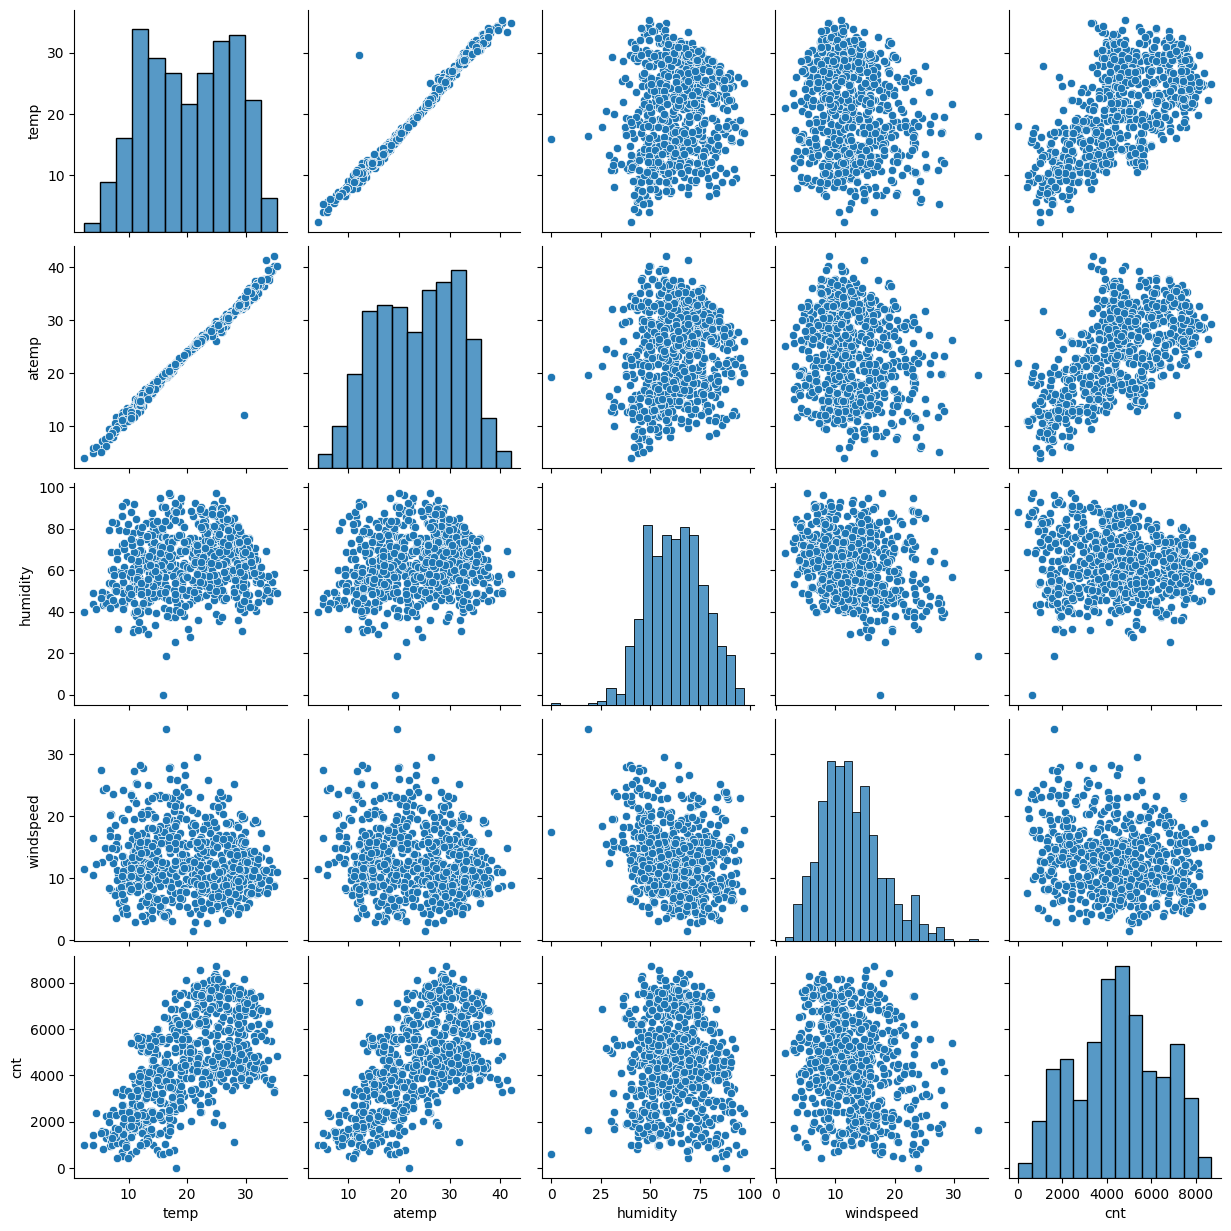

In [96]:
sns.pairplot(bike_df[['temp', 'atemp', 'humidity', 'windspeed','cnt']])

##### Categorical variables

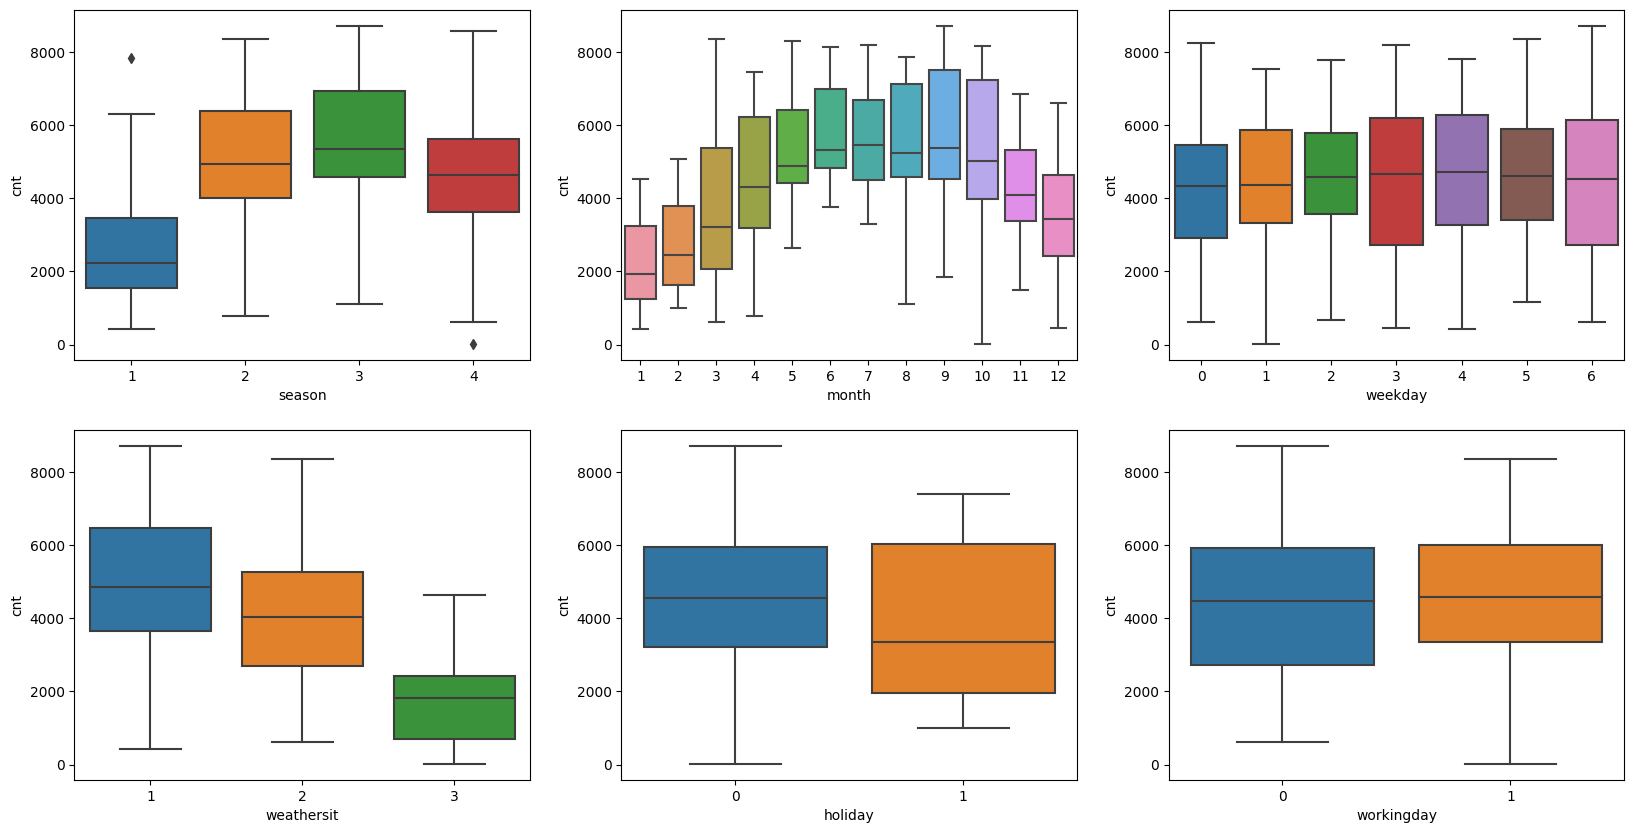

In [97]:
i = 1
plt.figure(figsize=(20,10))

for col in categorical:
    plt.subplot(2,3,i)
    sns.boxplot(x=col, y='cnt', data=bike_df)
    i+=1


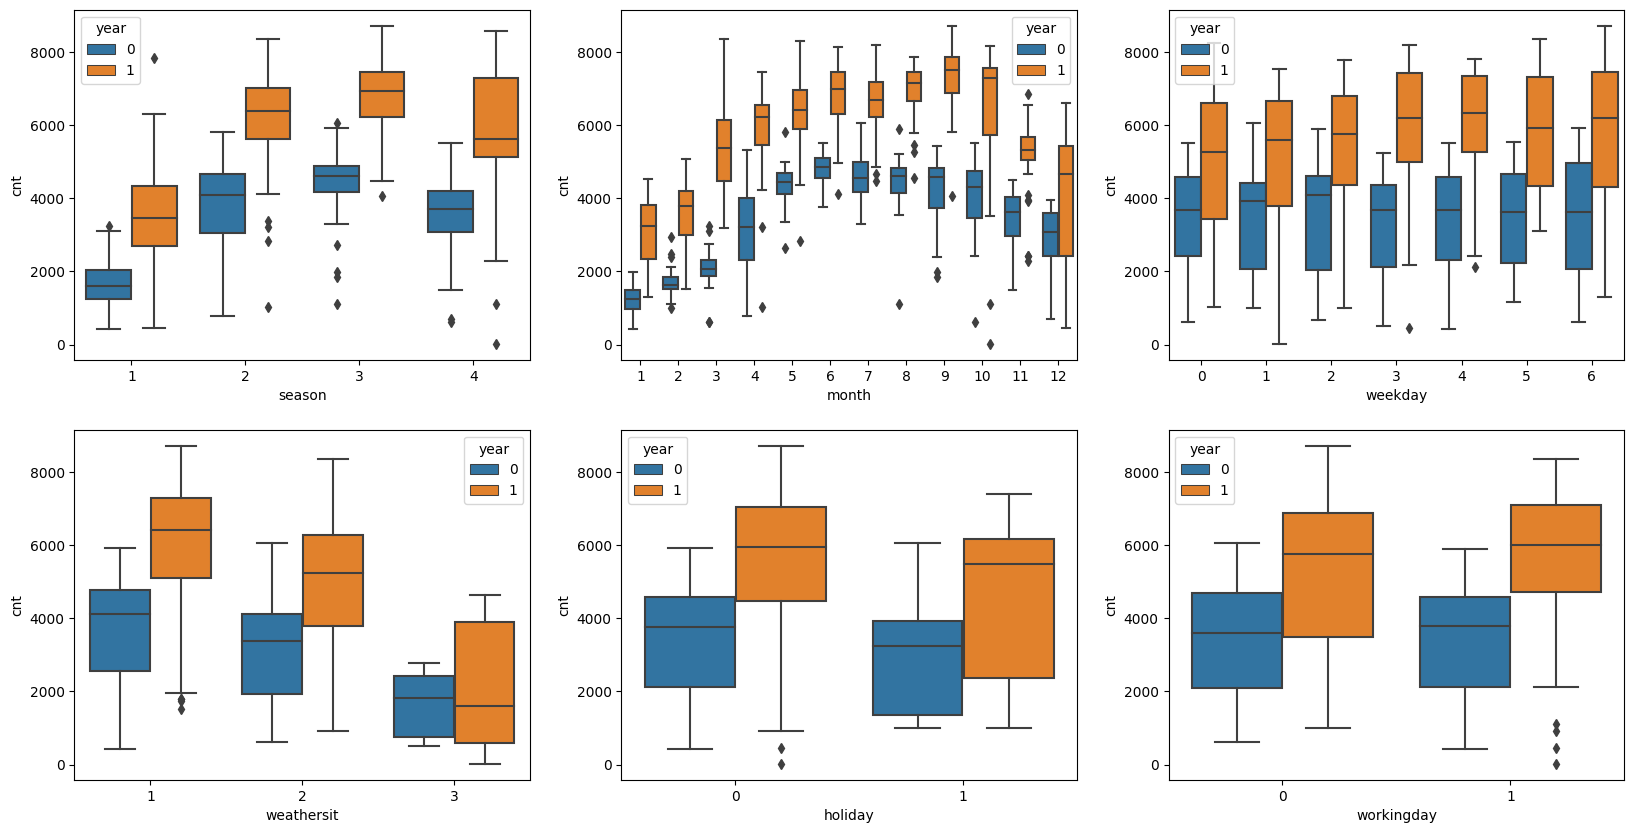

In [99]:
i = 1
plt.figure(figsize=(20,10))

for col in categorical:
    plt.subplot(2,3,i)
    sns.boxplot(x=col, y='cnt', hue='year', data=bike_df)
    i+=1

### Insights

- By season: most of the rentals happen in season3  
- The number of rental increases from month 4 to month 10
- There are more rental when it is not holiday
- by year we can see that the number of rental increased in 2019(year 1) compared to year 2018

### Step 5: Generating dummies variables for all the categorical values

In [100]:
# get all the dummies in the varibles
dummies = pd.get_dummies(bike_df[['season', 'weathersit','weekday','month']], drop_first=True)

bike_df = pd.concat([bike_df, dummies], axis=1)

bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [101]:
# drop all the categorical varibles as there not needed anymore and are coded as dummy

bike_df.drop(['season', 'weathersit','weekday','month'], axis=1, inplace=True)
bike_df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_2,season_3,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


<span style="color:#F56EB3"><strong> Now data set is now complete with dummies created </strong><span>

In [102]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   humidity      730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  weathersit_2  730 non-null    uint8  
 12  weathersit_3  730 non-null    uint8  
 13  weekday_1     730 non-null    uint8  
 14  weekday_2     730 non-null    uint8  
 15  weekday_3     730 non-null    uint8  
 16  weekday_4     730 non-null    uint8  
 17  weekday_5     730 non-null    uint8  
 18  weekday_6     730 non-null    

### Step 5: split the data into train test

In [103]:
from sklearn.model_selection import train_test_split
bike_train, bike_test = train_test_split(bike_df, train_size=.7, random_state=1)
bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_2,season_3,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
135,0,0,1,23.677500,27.52560,78.7917,8.500357,3958,1,0,...,0,0,1,0,0,0,0,0,0,0
626,1,0,1,22.652500,27.02020,53.6667,14.416725,7591,0,1,...,0,0,0,0,0,0,1,0,0,0
554,1,0,1,29.144153,32.70270,68.3333,12.125325,6569,0,1,...,0,0,0,0,1,0,0,0,0,0
311,0,0,1,16.741653,20.61230,72.1667,4.625513,4205,0,0,...,0,0,0,0,0,0,0,0,1,0
312,0,0,1,16.400000,20.45395,75.8333,4.167119,4109,0,0,...,0,0,0,0,0,0,0,0,1,0


In [104]:
bike_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_2,season_3,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
248,0,0,1,22.140000,25.76000,88.6957,23.044181,2710,0,1,...,0,0,0,0,0,0,1,0,0,0
298,0,0,1,19.850847,23.64230,72.0417,9.959014,3894,0,0,...,0,0,0,0,0,0,0,1,0,0
159,0,0,1,33.141653,37.87895,56.8333,10.042161,3915,1,0,...,0,0,0,1,0,0,0,0,0,0
660,1,0,1,22.310847,26.51520,64.1667,6.334569,7466,0,0,...,0,0,0,0,0,0,0,1,0,0
511,1,0,0,28.290000,32.07125,69.7083,14.416457,6591,1,0,...,0,0,1,0,0,0,0,0,0,0


### Visualise the correlation matrix as a heat map

<AxesSubplot: >

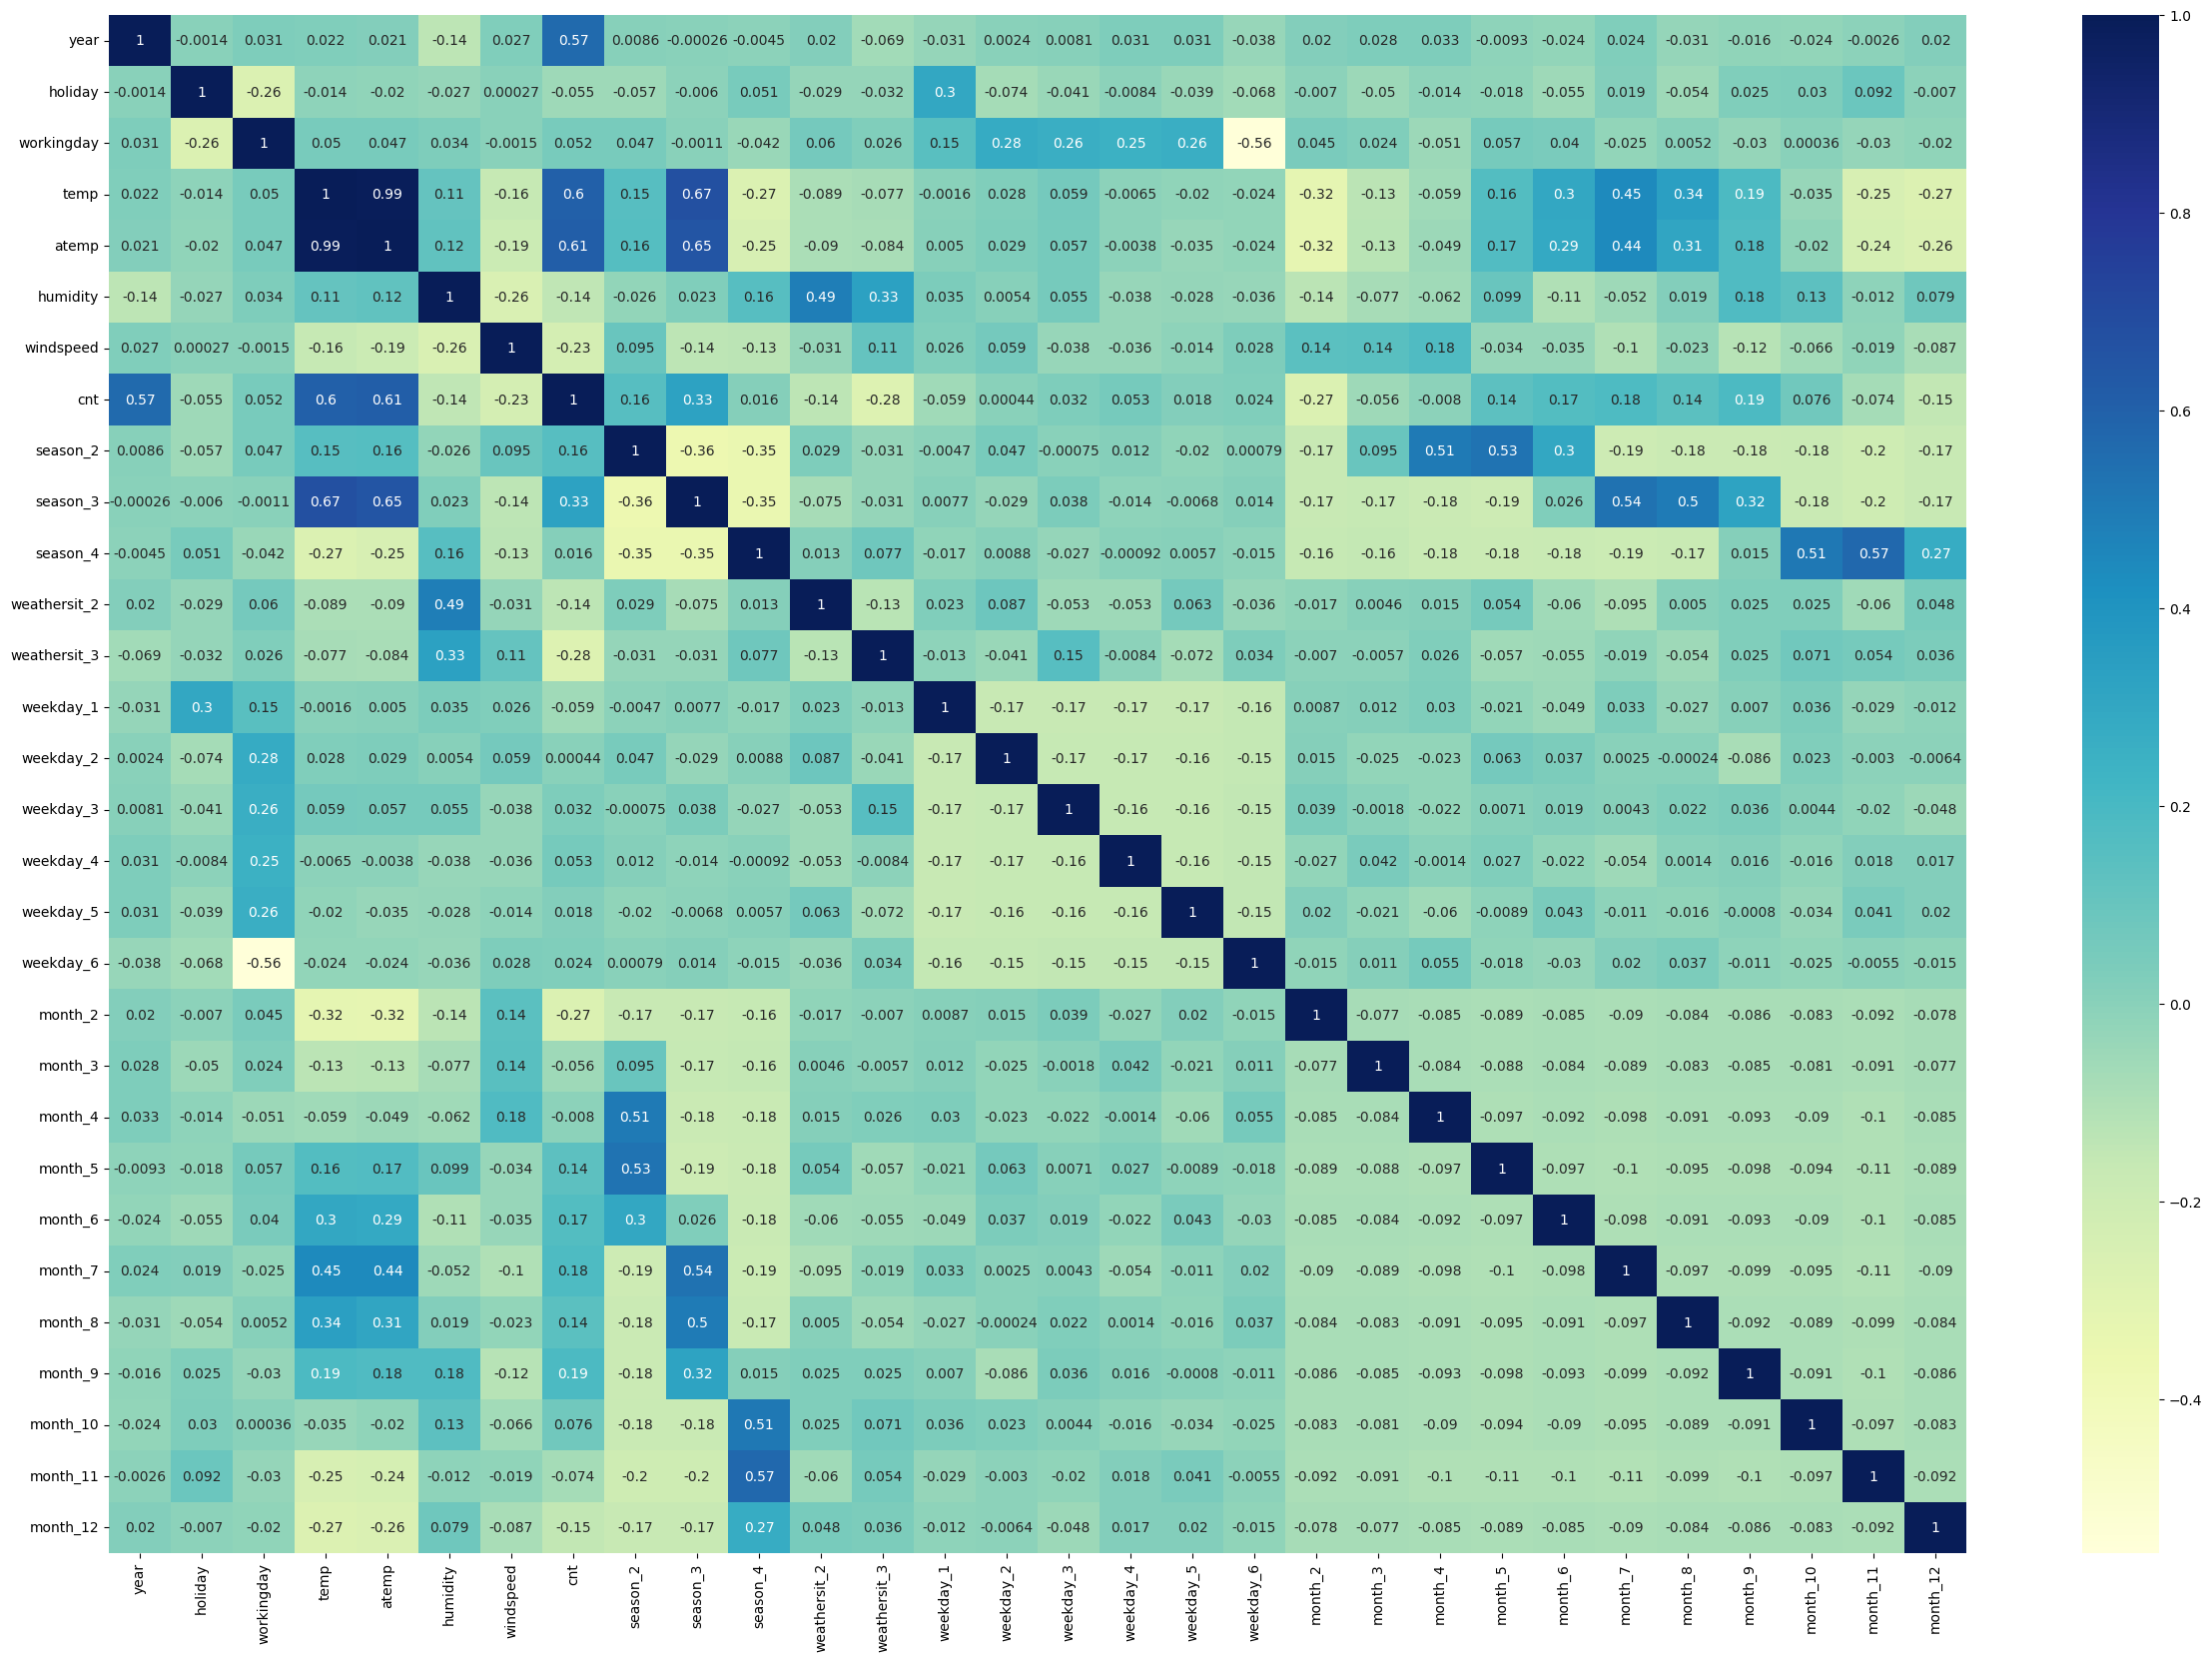

In [105]:
plt.figure(figsize=(30,20))
sns.heatmap(bike_train.corr(), annot=True, cmap='YlGnBu')

# Step 7: features scaling using StandarScaler

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [107]:
bike_train[['temp', 'atemp', 'humidity','windspeed', 'cnt']] = scaler.fit_transform(bike_train[['temp', 'atemp', 'humidity','windspeed', 'cnt']])
bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_2,season_3,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
135,0,0,1,0.403105,0.423978,1.115931,-0.795773,-0.330422,1,0,...,0,0,1,0,0,0,0,0,0,0
626,1,0,1,0.263454,0.360314,-0.686373,0.313950,1.581124,0,1,...,0,0,0,0,0,0,1,0,0,0
554,1,0,1,1.147913,1.076116,0.365713,-0.115844,1.043386,0,1,...,0,0,0,0,1,0,0,0,0,0
311,0,0,1,-0.541873,-0.446863,0.640696,-1.522570,-0.200460,0,0,...,0,0,0,0,0,0,0,0,1,0
312,0,0,1,-0.588422,-0.466810,0.903714,-1.608550,-0.250972,0,0,...,0,0,0,0,0,0,0,0,1,0


In [108]:
bike_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_2,season_3,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
count,510.000000,510.000000,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.503922,0.031373,0.682353,9.055937e-17,-2.786442e-17,-2.856103e-16,-3.901019e-16,2.263984e-16,0.264706,0.264706,...,0.070588,0.084314,0.092157,0.084314,0.094118,0.082353,0.086275,0.080392,0.098039,0.072549
std,0.500476,0.174494,0.466018,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.441610,0.441610,...,0.256387,0.278131,0.289531,0.278131,0.292279,0.275172,0.281045,0.272166,0.297660,0.259649
min,0.000000,0.000000,0.000000,-2.492544e+00,-2.545309e+00,-2.712845e+00,-2.108771e+00,-2.401395e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.479426e-01,-8.037675e-01,-7.568085e-01,-7.177059e-01,-6.509865e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,6.561451e-02,1.296392e-01,-7.896451e-03,-1.510567e-01,1.000430e-02,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,8.499910e-01,8.047526e-01,7.333473e-01,5.933254e-01,7.086157e-01,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.920656e+00,2.022329e+00,2.440009e+00,3.158984e+00,2.172003e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Spliting the data into <strong>y_train, X_train<strong>

In [109]:
y_train = bike_train.pop('cnt')
X_train = bike_train
y_train

135   -0.330422
626    1.581124
554    1.043386
311   -0.200460
312   -0.250972
         ...   
645    0.469344
715   -0.000519
72    -1.336444
235    0.286239
37    -1.512182
Name: cnt, Length: 510, dtype: float64

# Model building using RFE

In [110]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [111]:
lng = LinearRegression()

lng.fit(X_train, y_train)

rfe = RFE(lng, n_features_to_select=15)

rfe = rfe.fit(X_train, y_train)

In [112]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 4),
 ('atemp', True, 1),
 ('humidity', False, 8),
 ('windspeed', False, 9),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', True, 1),
 ('month_2', False, 12),
 ('month_3', False, 5),
 ('month_4', False, 11),
 ('month_5', False, 6),
 ('month_6', False, 10),
 ('month_7', False, 13),
 ('month_8', False, 7),
 ('month_9', True, 1),
 ('month_10', False, 3),
 ('month_11', False, 14),
 ('month_12', False, 15)]

In [113]:
col = X_train.columns[rfe.support_]

# Building with statsmodel and calculate vif

## Model - 1

In [114]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


X_train_rfe = X_train[col]

In [115]:
def build_model_stats(col):
    X_train_rfe_sm = sm.add_constant(X_train[col])
    lm = sm.OLS(y_train, X_train_rfe_sm).fit()
    print(lm.summary())
    return lm, X_train_rfe_sm

def build_vif(col):
    X = X_train[col]
    vif = pd.DataFrame()
    vif['features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending= False)
    print(vif)

In [116]:
lm, x = build_model_stats(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     135.9
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          2.14e-159
Time:                        11:40:03   Log-Likelihood:                -321.28
No. Observations:                 510   AIC:                             672.6
Df Residuals:                     495   BIC:                             736.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1097      0.079    -14.057   

###### <span style="color:red">before removing using VIF we can remove weekday_5 as it is insignificant looking at the P values od the coefficient<span>

## Model - 2

In [117]:
# Dropping the variable weekdya_5 it has high p-value thus is insignificant  
col = col.drop('weekday_5')
lm, x = build_model_stats(col)
build_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     135.9
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          2.14e-159
Time:                        11:40:08   Log-Likelihood:                -321.28
No. Observations:                 510   AIC:                             672.6
Df Residuals:                     495   BIC:                             736.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1097      0.079    -14.057   

## Model - 3

In [118]:
# Dropping the variable holyday it has high p-value thus is insignificant  
col = col.drop('holiday')
lm, x = build_model_stats(col)
build_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     146.5
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          2.32e-160
Time:                        11:40:20   Log-Likelihood:                -321.58
No. Observations:                 510   AIC:                             671.2
Df Residuals:                     496   BIC:                             730.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1236      0.077    -14.632   

## Model - 4

In [119]:
# Dropping the variable weekday_3 it has high p-value thus is insignificant  
col = col.drop('weekday_3')
lm, x = build_model_stats(col)
build_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     158.9
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          2.17e-161
Time:                        11:40:26   Log-Likelihood:                -321.78
No. Observations:                 510   AIC:                             669.6
Df Residuals:                     497   BIC:                             724.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1191      0.076    -14.650   

### Model - 5


In [120]:
# Dropping the variable weekday_4 it has high p-value thus is insignificant
col = col.drop('weekday_4')
lm, x = build_model_stats(col)
build_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     173.5
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          1.83e-162
Time:                        11:40:35   Log-Likelihood:                -321.91
No. Observations:                 510   AIC:                             667.8
Df Residuals:                     498   BIC:                             718.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1175      0.076    -14.653   

### Model - 6

In [121]:
# Dropping the variable weekday_4 it has high p-value thus is insignificant
col = col.drop('weekday_2')
lm, x = build_model_stats(col)
build_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     189.3
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          1.01e-162
Time:                        11:40:43   Log-Likelihood:                -324.02
No. Observations:                 510   AIC:                             670.0
Df Residuals:                     499   BIC:                             716.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1220      0.076    -14.673   

### Model - 7

In [ ]:
# Dropping the variable weekday_4 it has high p-value thus is insignificant
col = col.drop('weekday_1')
lm, x = build_model_stats(col)
build_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     208.9
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          3.89e-163
Time:                        11:40:46   Log-Likelihood:                -325.81
No. Observations:                 510   AIC:                             671.6
Df Residuals:                     500   BIC:                             714.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1378      0.076    -14.933   

 **The final variable are year: `'workingday' ,'atemp,season_2', 'season_3', 'season_4', 'weathersit_3', 'weekday_6, month_9'`**

# Residuals analysis

In [37]:
y_pred_cnt = lm.predict(x)

Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

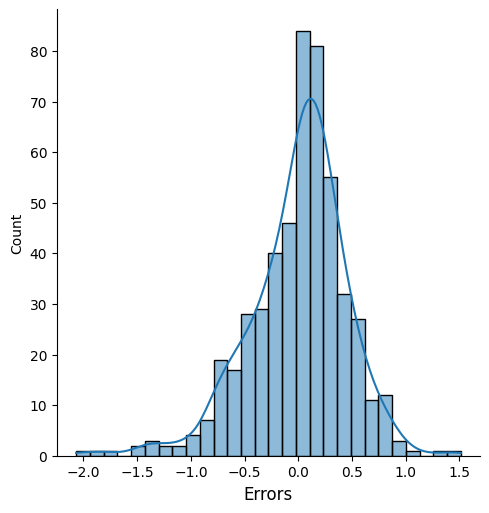

In [62]:
plt.figure()
sns.displot((y_train-y_pred_cnt), kde=True)
plt.xlabel('Errors',fontsize=12)

Text(0, 0.5, 'Residual')

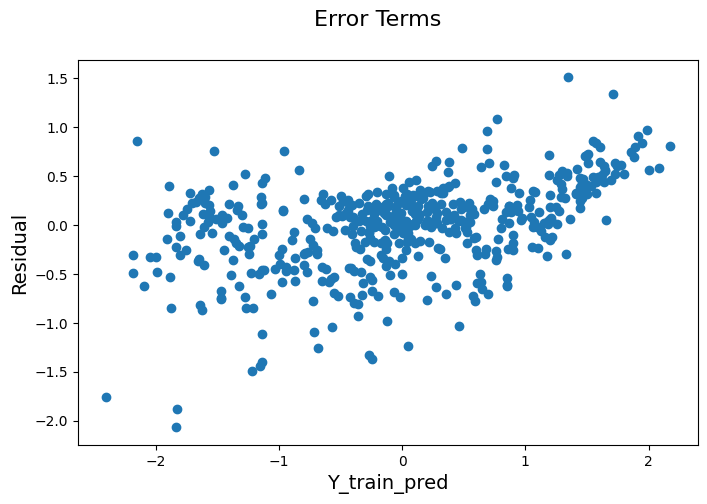

In [125]:
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,(y_train-y_pred_cnt))
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_train_pred', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14) 

**Insights**
It seems like the corresponding residual plot is reasonably random. 
Also the error terms satisfies to have reasonably constant variance (homoscedasticity) 

# Making predictions

Residuals or errors terms should follow a normal distribution with a mean of 0



In [64]:
bike_test[['temp', 'atemp', 'humidity','windspeed', 'cnt']] = scaler.transform(bike_test[['temp', 'atemp', 'humidity','windspeed', 'cnt']])
bike_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_2,season_3,season_4,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
248,0,0,1,0.193628,0.201572,1.826379,1.932187,0,1,0,...,0,0,0,0,0,0,1,0,0,0
298,0,0,1,-0.118259,-0.065186,0.631730,-0.522175,0,0,1,...,0,0,0,0,0,0,0,1,0,0
159,0,0,1,1.692555,1.728148,-0.459222,-0.506579,1,0,0,...,0,0,0,1,0,0,0,0,0,0
660,1,0,1,0.216905,0.296702,0.066828,-1.202006,0,0,1,...,0,0,0,0,0,0,0,1,0,0
511,1,0,0,1.031538,0.996575,0.464347,0.313900,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [68]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [78]:
X_test_new = X_test[col]

X_test_new = sm.add_constant(X_test_new)

In [79]:
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

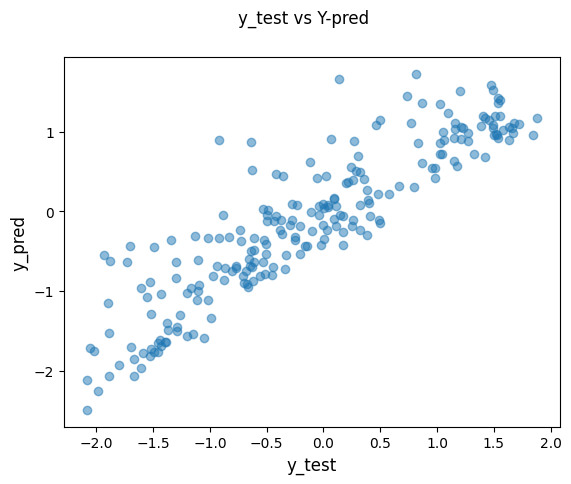

In [80]:
plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
plt.suptitle('y_test vs Y-pred')
plt.xlabel('y_test', fontsize=12)
plt.ylabel('y_pred', fontsize=12)

 # R^2 Value for TEST

In [81]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8016051990731453